# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
# Functions Used

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

In [4]:
t_a = df['temperature'].values
print(t_a)

[ 99.3  98.4  97.8  99.2  98.   99.2  98.   98.8  98.4  98.6  98.8  96.7
  98.2  98.7  97.8  98.8  98.3  98.2  97.2  99.4  98.3  98.2  98.6  98.4
  97.8  98.   97.8  98.2  98.4  98.1  98.3  97.6  98.5  98.6  99.3  99.5
  99.1  98.3  97.9  96.4  98.4  98.4  96.9  97.2  99.   97.9  97.4  97.4
  97.9  97.1  98.9  98.3  98.5  98.6  98.2  98.6  98.8  98.2  98.2  97.6
  99.1  98.4  98.2  98.6  98.7  97.4  97.4  98.6  98.7  98.9  98.1  97.7
  98.   98.8  99.   98.8  98.   98.4  97.4  97.6  98.8  98.   97.5  99.2
  98.6  97.1  98.6  98.   98.7  98.1  97.8 100.   98.8  97.1  97.8  96.8
  99.9  98.7  98.8  98.   99.   98.5  98.   99.4  97.6  96.7  97.   98.6
  98.7  97.3  98.8  98.   98.2  99.1  99.   98.  100.8  97.8  98.7  98.4
  97.7  97.9  99.   97.2  97.5  96.3  97.7  98.2  97.9  98.7]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels.stats as smd
import pylab
t_a.sort()

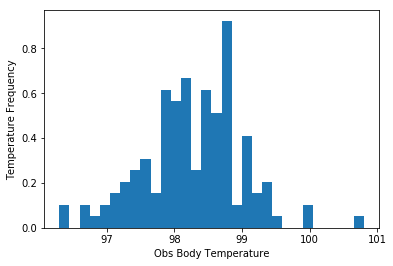

In [6]:
_ = plt.hist(t_a, bins=30, normed=True)
_ = plt.xlabel('Obs Body Temperature')
_ = plt.ylabel('Temperature Frequency')
plt.show()

## 1. Goal: Using the Average, Variance, show that Body Temperature tends to a Normal Distribution



In [7]:
#Step 1: Substract the calc. mean from the observations 
de = t_a - np.mean(t_a)
print(de)

[-1.94923077 -1.84923077 -1.54923077 -1.54923077 -1.44923077 -1.34923077
 -1.24923077 -1.14923077 -1.14923077 -1.14923077 -1.04923077 -1.04923077
 -1.04923077 -0.94923077 -0.84923077 -0.84923077 -0.84923077 -0.84923077
 -0.84923077 -0.74923077 -0.74923077 -0.64923077 -0.64923077 -0.64923077
 -0.64923077 -0.54923077 -0.54923077 -0.54923077 -0.44923077 -0.44923077
 -0.44923077 -0.44923077 -0.44923077 -0.44923077 -0.44923077 -0.34923077
 -0.34923077 -0.34923077 -0.34923077 -0.34923077 -0.24923077 -0.24923077
 -0.24923077 -0.24923077 -0.24923077 -0.24923077 -0.24923077 -0.24923077
 -0.24923077 -0.24923077 -0.24923077 -0.14923077 -0.14923077 -0.14923077
 -0.04923077 -0.04923077 -0.04923077 -0.04923077 -0.04923077 -0.04923077
 -0.04923077 -0.04923077 -0.04923077 -0.04923077  0.05076923  0.05076923
  0.05076923  0.05076923  0.05076923  0.15076923  0.15076923  0.15076923
  0.15076923  0.15076923  0.15076923  0.15076923  0.15076923  0.15076923
  0.25076923  0.25076923  0.25076923  0.35076923  0

In [8]:
#Step 2: Raise the result to power of 2
a = np.power(de, 2)
print(a)

[3.79950059e+00 3.41965444e+00 2.40011598e+00 2.40011598e+00
 2.10026982e+00 1.82042367e+00 1.56057751e+00 1.32073136e+00
 1.32073136e+00 1.32073136e+00 1.10088521e+00 1.10088521e+00
 1.10088521e+00 9.01039053e-01 7.21192899e-01 7.21192899e-01
 7.21192899e-01 7.21192899e-01 7.21192899e-01 5.61346746e-01
 5.61346746e-01 4.21500592e-01 4.21500592e-01 4.21500592e-01
 4.21500592e-01 3.01654438e-01 3.01654438e-01 3.01654438e-01
 2.01808284e-01 2.01808284e-01 2.01808284e-01 2.01808284e-01
 2.01808284e-01 2.01808284e-01 2.01808284e-01 1.21962130e-01
 1.21962130e-01 1.21962130e-01 1.21962130e-01 1.21962130e-01
 6.21159763e-02 6.21159763e-02 6.21159763e-02 6.21159763e-02
 6.21159763e-02 6.21159763e-02 6.21159763e-02 6.21159763e-02
 6.21159763e-02 6.21159763e-02 6.21159763e-02 2.22698225e-02
 2.22698225e-02 2.22698225e-02 2.42366864e-03 2.42366864e-03
 2.42366864e-03 2.42366864e-03 2.42366864e-03 2.42366864e-03
 2.42366864e-03 2.42366864e-03 2.42366864e-03 2.42366864e-03
 2.57751479e-03 2.577514

In [10]:
#Step 3: Divide the array by -2*(std^2)
b = np.divide(a, -1.0745)
print(b)

[-3.53606384e+00 -3.18255415e+00 -2.23370496e+00 -2.23370496e+00
 -1.95464851e+00 -1.69420537e+00 -1.45237554e+00 -1.22915901e+00
 -1.22915901e+00 -1.22915901e+00 -1.02455580e+00 -1.02455580e+00
 -1.02455580e+00 -8.38565894e-01 -6.71189297e-01 -6.71189297e-01
 -6.71189297e-01 -6.71189297e-01 -6.71189297e-01 -5.22426008e-01
 -5.22426008e-01 -3.92276028e-01 -3.92276028e-01 -3.92276028e-01
 -3.92276028e-01 -2.80739356e-01 -2.80739356e-01 -2.80739356e-01
 -1.87815993e-01 -1.87815993e-01 -1.87815993e-01 -1.87815993e-01
 -1.87815993e-01 -1.87815993e-01 -1.87815993e-01 -1.13505938e-01
 -1.13505938e-01 -1.13505938e-01 -1.13505938e-01 -1.13505938e-01
 -5.78091916e-02 -5.78091916e-02 -5.78091916e-02 -5.78091916e-02
 -5.78091916e-02 -5.78091916e-02 -5.78091916e-02 -5.78091916e-02
 -5.78091916e-02 -5.78091916e-02 -5.78091916e-02 -2.07257538e-02
 -2.07257538e-02 -2.07257538e-02 -2.25562461e-03 -2.25562461e-03
 -2.25562461e-03 -2.25562461e-03 -2.25562461e-03 -2.25562461e-03
 -2.25562461e-03 -2.25562

In [11]:
#Step 4: Use the exponential function
c = np.exp(b)
print(c)

[0.02912775 0.04147957 0.10713078 0.10713078 0.14161424 0.18374518
 0.23401372 0.29253849 0.29253849 0.29253849 0.35895588 0.35895588
 0.35895588 0.43233009 0.51110037 0.51110037 0.51110037 0.51110037
 0.51110037 0.59307998 0.59307998 0.67551763 0.67551763 0.67551763
 0.67551763 0.75522515 0.75522515 0.75522515 0.82876719 0.82876719
 0.82876719 0.82876719 0.82876719 0.82876719 0.82876719 0.8926989
 0.8926989  0.8926989  0.8926989  0.8926989  0.94383002 0.94383002
 0.94383002 0.94383002 0.94383002 0.94383002 0.94383002 0.94383002
 0.94383002 0.94383002 0.94383002 0.97948755 0.97948755 0.97948755
 0.99774692 0.99774692 0.99774692 0.99774692 0.99774692 0.99774692
 0.99774692 0.99774692 0.99774692 0.99774692 0.99760407 0.99760407
 0.99760407 0.99760407 0.99760407 0.97906691 0.97906691 0.97906691
 0.97906691 0.97906691 0.97906691 0.97906691 0.97906691 0.97906691
 0.94315458 0.94315458 0.94315458 0.89180463 0.89180463 0.89180463
 0.89180463 0.89180463 0.89180463 0.89180463 0.89180463 0.89180

In [12]:
#Step 5: Multiply the array by std*(2*Pi)^.5
d = np.multiply(c,.54439)
print(d)

[0.01585686 0.02258107 0.05832092 0.05832092 0.07709338 0.10002904
 0.12739473 0.15925503 0.15925503 0.15925503 0.19541199 0.19541199
 0.19541199 0.23535618 0.27823793 0.27823793 0.27823793 0.27823793
 0.27823793 0.32286681 0.32286681 0.36774504 0.36774504 0.36774504
 0.36774504 0.41113702 0.41113702 0.41113702 0.45117257 0.45117257
 0.45117257 0.45117257 0.45117257 0.45117257 0.45117257 0.48597635
 0.48597635 0.48597635 0.48597635 0.48597635 0.51381163 0.51381163
 0.51381163 0.51381163 0.51381163 0.51381163 0.51381163 0.51381163
 0.51381163 0.51381163 0.51381163 0.53322323 0.53322323 0.53322323
 0.54316344 0.54316344 0.54316344 0.54316344 0.54316344 0.54316344
 0.54316344 0.54316344 0.54316344 0.54316344 0.54308568 0.54308568
 0.54308568 0.54308568 0.54308568 0.53299424 0.53299424 0.53299424
 0.53299424 0.53299424 0.53299424 0.53299424 0.53299424 0.53299424
 0.51344392 0.51344392 0.51344392 0.48548952 0.48548952 0.48548952
 0.48548952 0.48548952 0.48548952 0.48548952 0.48548952 0.4854

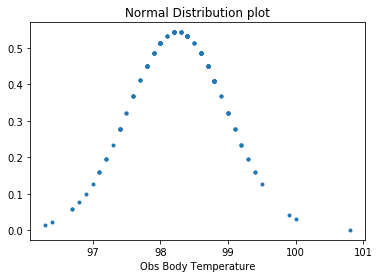

In [13]:
#Step 6: Plotting shows that Body temperature tends to a Normal Distribution
_ = plt.plot(t_a, d, marker='.', linestyle ='none')
_ = plt.xlabel('Obs Body Temperature')
_ = plt.title("Normal Distribution plot")
plt.show()

## 2. Is the sample size large? Are the observations independent?
According to the requirements of the Central Limit Theorem for size of sample and independent observations:

I can conclude that my sample size meets the requirement of n>30. The sample size is 130, which is bigger than 30 and total sample size is less than the 10% of the population size of body temperature. 

## 3. Is the true population mean really 98.6 degrees F?

In [14]:
#i) Use Bootstrap hypothesis testing with 100k samples.
# Mean of observed sample is 98.4 degrees F. Thus test statistic is the mean
# Ho: mean equal 98.24 Ha: mean not equal 98.24

ta_bsrep = np.empty(100000)

size = len(ta_bsrep)

for i in range(size):
    ta_sample = np.random.choice(t_a, len(t_a))
    ta_bsrep[i] = np.mean(ta_sample)
    
p = np.sum(ta_bsrep >= 98.6) / size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(ta_bsrep)))


p-value: 0.0
mean: 98.249


Based on the result of a p_value of 0, it can be concluded that the probability of obtaining a result as extreme as for 98.6 is not possible.

In [15]:
#i) Using Z test for onw sample
#Ho: mean equal 98.24 Ha: mean not equal 98.24

mean = np.mean(t_a)
s_sqr = np.sqrt(130)
stde = np.std(t_a)/s_sqr  
 
z_t = (mean - 98.6)/stde
print('Z score:{:.05}'.format(z_t))


Z score:-5.4759


For this particular case, given the calculated Z value, I will accept the null hypothesis that population is equal to 98.24 with a confidence acceptance of 95% for the given samples.

## ii) Would you use a one-sample or two-sample test? Why?

For this particular case: only one variable with one population mean is being anlyzing, using a one-sample test is sufficient.

## iii) Test: Z vs t?

Although the population σ is unknown, I proved that Temperature observations follow the Normal Distribution so I can infer that the sample mean is a good estimator of the population σ. Thus, I will use the Z test.

## iv)  How is the result be different if using the other test? Why?

In [16]:
t_ta = stats.ttest_1samp(t_a, 98.6 )
print('t-score: {}\np-value: {}'.format(round(t_ta.statistic, 5), round(t_ta.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


For this particular situation: it can be observe that the Z-score and t-score have minimun difference. There is the possibility of using a lower sample than 30 to find out if a bigger difference between them exists.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
ii)Which one is the correct one to use?
iii)What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [17]:
## Draw a small sample
sa_temp = np.random.choice(t_a, size=10)

## Use t-statistics
t_sa = stats.ttest_1samp(sa_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(t_sa.statistic, t_sa.pvalue))


t-score: -1.057
p-value: 0.3179


In [18]:
#Parameters for n=10
sa_mean = np.mean(sa_temp)
sa_std = np.std(sa_temp)/3.16   #Sample n=10 --> square root of 10 = 3.16

print('mean: {:0.4}'.format(sa_mean))
print('p-value: {:0.4}'.format(sa_std))



mean: 98.23
p-value: 0.3322


In [19]:
## Use Z-statistics
z_small =(sa_mean - 98.6)/sa_std
print('Z score:{:.05}'.format(z_small))

Z score:-1.1137


## t-test vs z-test
ii) Given the small sample (n = 10) and that population σ is unknown, the best statistics test is the t-distribution.

iii) Tells that even with such small sample, the difference in scores are minimal.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
i) As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.Start by computing the margin of error and confidence interval. When calculating the confidence interval, 
keep in mind that you should use the appropriate formula for one draw, and not N draws

In [20]:
#Parameters of Original Sample
t_am = np.mean(t_a)
t_as = np.std(t_a)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(t_am,t_as))

sample mean: 98.25
sample standard deviation: 0.7304



In [21]:
#i) Calculates p value using 100k boostrap replicates
boot_rep = np.empty(100000)

size = len(boot_rep)

for i in range(size):
    boot_s = np.random.choice(t_a, size=len(t_a))
    boot_rep[i] = np.mean(boot_s)

phigh = np.sum(boot_rep > 99)/ len(boot_rep)
print('p-value high: {}'.format(phigh))
plow= np.sum(boot_rep < 97)/len(boot_rep)
print('p-value low: {}'.format(plow))

##calculate the confidence interval and the margin of error

ci = np.percentile(boot_rep, [2.5, 97.5])
r_m = np.mean(boot_rep)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - r_m)))
print(r_m)

p-value high: 0.0
p-value low: 0.0
95% confidence interval: 98.123 - 98.375
margin of error: +/-0.12549


98.24912637692306


Based on information found on medical sites, the normal body temperature of an adult is within the mean rage of 97-99 F. For our particular samples, we can conclude that none of the observations are abnormal.

## 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [22]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))

Of the 130 participants, 65 are female and 65 are male.


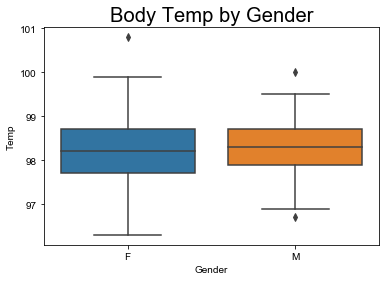

In [23]:
# Plot a boxplot
sns.boxplot(x = 'gender', y = 'temperature', data=df)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Body Temp by Gender')

plt.show();


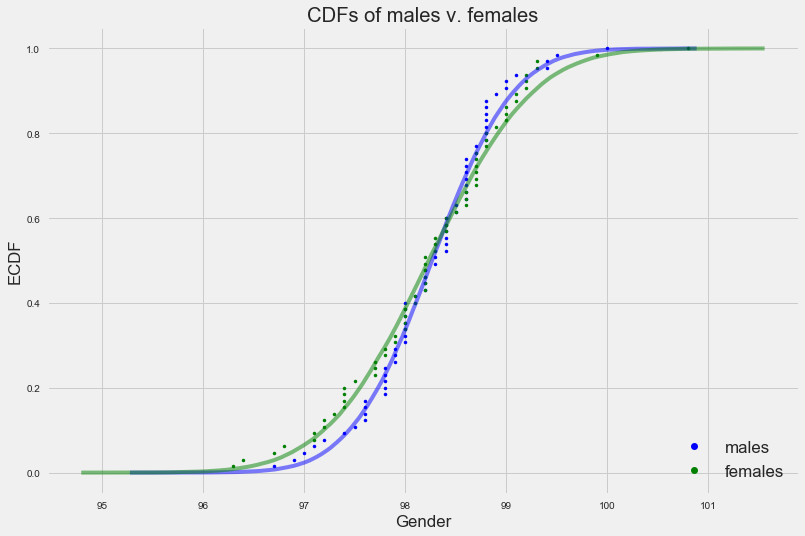

In [24]:
# Both samples normally distributed?
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Calculate ECDFs for males/females
x_ma, y_ma = ecdf(males.temperature)
x_fem, y_fem = ecdf(females.temperature)

# Generate plot
_ = plt.plot(x_ma, y_ma, marker = '.', linestyle = 'none', color='b')
_ = plt.plot(x_fem, y_fem, marker='.', linestyle='none', color='g')

# Draw 100K random samples from a normal distribution
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000)
mnd_x, mnd_y = ecdf(m_norm_dist)
_ = plt.plot(mnd_x, mnd_y, color='b', alpha=0.5)

# Draw 100K random samples from a normal distribution
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = ecdf(f_norm_dist)
_ = plt.plot(fnd_x, fnd_y, color='g', alpha=0.5)

# Make the margins nice
plt.margins = 0.02

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('ECDF')
_ = plt.title('CDFs of males v. females')
_ = plt.legend(('males', 'females'), loc='lower right', fontsize='large', markerscale=2)

plt.show()

In [25]:
# Variables
t_m = males.temperature
t_f = females.temperature

# Common Parameteres
m_m = np.mean(t_m)
f_m = np.mean(t_f)
m_v = np.var(t_m)
f_v = np.var(t_f)
print('Male mean: {}\nFemale mean: {}'.format(m_m, f_m))
print('Male variance: {}\nFemale variance: {}'.format(m_v, f_v))

Male mean: 98.26615384615388
Female mean: 98.2323076923077
Male variance: 0.4031621301775148
Female variance: 0.6631100591715965


In [26]:
# Are the means equal? Confirm with bootstrap. H0: female_m = male_m

size = 10000

b_rep_m = np.empty(size)

for i in range(size):
    b_s_male = np.random.choice(t_m, len(t_m))
    b_rep_m[i] = np.mean(b_s_male)

mean_repm = np.mean(b_rep_m)   

b_rep_f = np.empty(size)

for i in range(size):
    b_s_female = np.random.choice(t_f, len(t_f))
    b_rep_f[i] = np.mean(b_s_female)

mean_repf = np.mean(b_rep_f)

print('Bootstrap verification:\nMale average: {}\nFemale average: {}'.format(mean_repm, mean_repf))

Bootstrap verification:
Male average: 98.26616707692308
Female average: 98.23396215384616


In [27]:
# Perform Z-Test for 2 samples with alpha = .5 or Z value = 1.96 
# Hypothesis: H0: female_mean = male_mean; Ha: female_mean not equal male_mean 
#Numerator
mean_dif = m_m - f_m

#Denominator
var_di = (m_v + f_v)/65
svar = np.sqrt(var_di)

#Z value 
ztest = mean_dif/svar
print('Z value: {}'.format(ztest))

Z value: 0.2642603230019808


In [28]:
pval= stats.norm.cdf(ztest)
print(pval)

0.6042103342629247


From my analysis, I do not reject my null hyphotesis sine my Z value of .2642 is within the appropriate range of Z = 1.96. This means that gender does not play a role in the body temperature.